In [1]:
from ml_config import *

In [2]:
from pgmpy.factors.discrete import TabularCPD

In [3]:
cpd_X = TabularCPD('X',2,[[1-0.002, 0.002]])
print(cpd_X)

╒═════╤═══════╕
│ X_0 │ 0.998 │
├─────┼───────┤
│ X_1 │ 0.002 │
╘═════╧═══════╛


In [5]:
cpd = TabularCPD('Y',2,np.array([[0.95,0.01],[0.05,0.99]]),
                evidence=['X'], evidence_card=[2])
print(cpd)

╒═════╤══════╤══════╕
│ X   │ X_0  │ X_1  │
├─────┼──────┼──────┤
│ Y_0 │ 0.95 │ 0.01 │
├─────┼──────┼──────┤
│ Y_1 │ 0.05 │ 0.99 │
╘═════╧══════╧══════╛


In [6]:
from pgmpy.models import BayesianModel

In [7]:
model = BayesianModel([('X', 'Y')])
model.add_cpds(cpd_X, cpd)
model.check_model()

True

In [9]:
from pgmpy.inference import VariableElimination

In [11]:
infer = VariableElimination(model)
posterior = infer.query(['X'], evidence={'Y':1})
print(posterior['X'])

╒═════╤══════════╕
│ X   │   phi(X) │
╞═════╪══════════╡
│ X_0 │   0.9618 │
├─────┼──────────┤
│ X_1 │   0.0382 │
╘═════╧══════════╛


$$
P(A,B,C) = P(A|B,C)P(B,C) = P(A|B,C)P(B|C)P(C)\\
P(A,B,C) = P(B|A,C)P(A,C) = P(B|A,C)P(A|C)P(C)\\
P(A|B,C)P(B|C)P(C) = P(B|A,C)P(A|C)P(C)\\
P(A|B,C) = \dfrac{P(B|A,C)P(A|C)}{P(B|C)}
$$

In [2]:
import scipy as sp

In [3]:
rv = sp.stats.norm()
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

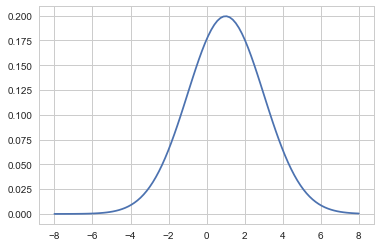

In [11]:
rv = sp.stats.norm(loc=1,scale=2)
xx = np.linspace(-8,8,100)
pdf = rv.pdf(xx)
plt.plot(xx,pdf)
plt.show()

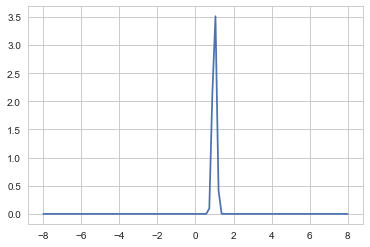

In [8]:
rv = sp.stats.norm(loc=1,scale=0.1)
# 분산을 좁혀서 평균 주위에 값이 모여들게 함
xx = np.linspace(-8,8,100)
pdf = rv.pdf(xx)
plt.plot(xx,pdf)
plt.show()

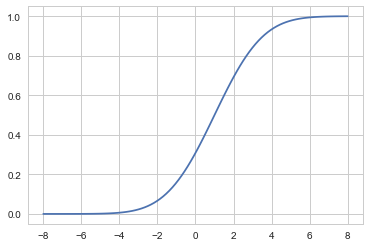

In [12]:
cdf = rv.cdf(xx)
plt.plot(xx,cdf)
plt.show()

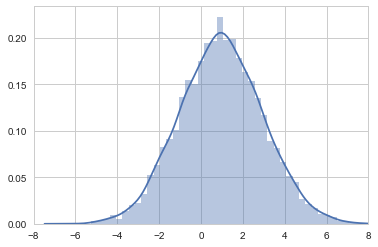

In [13]:
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.xlim(-8,8)
plt.show()

In [22]:
theta1 = 0.5
theta2 = 0.9
rv1 = sp.stats.bernoulli(theta1)
rv2 = sp.stats.bernoulli(theta2)

x1 = rv1.rvs(10,random_state=0)
x2 = rv1.rvs(1000,random_state=0)

x3 = rv2.rvs(10,random_state=0)
x4 = rv2.rvs(1000,random_state=0)

xx = [0, 1]

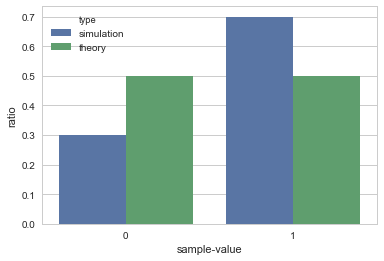

In [51]:
y1 = np.bincount(x1, minlength=2) / float(len(x1))

df = pd.DataFrame({"theory": rv1.pmf(xx), "simulation": y1})
df.index = [0, 1]
df2 = df.stack().reset_index()
df2.columns = ["sample-value", "type", "ratio"]
sns.barplot(x='sample-value',y='ratio',hue='type',data=df2)
plt.show()

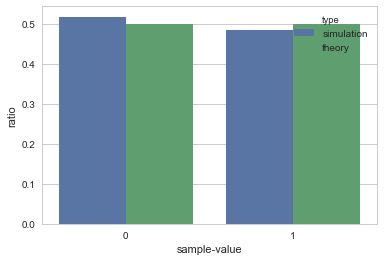

In [52]:
y2 = np.bincount(x2, minlength=2) / float(len(x2))

df = pd.DataFrame({"theory": rv1.pmf(xx), "simulation": y2})
df.index = [0, 1]
df2 = df.stack().reset_index()
df2.columns = ["sample-value", "type", "ratio"]
sns.barplot(x='sample-value',y='ratio',hue='type',data=df2)
plt.show()

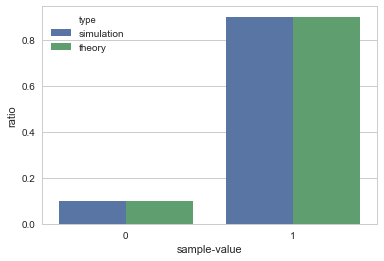

In [53]:
y3 = np.bincount(x3, minlength=2) / float(len(x3))

df = pd.DataFrame({"theory": rv2.pmf(xx), "simulation": y3})
df.index = [0, 1]
df2 = df.stack().reset_index()
df2.columns = ["sample-value", "type", "ratio"]
sns.barplot(x='sample-value',y='ratio',hue='type',data=df2)
plt.show()

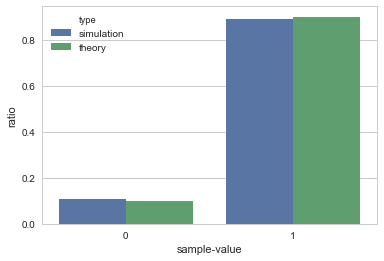

In [54]:
y4 = np.bincount(x4, minlength=2) / float(len(x4))

df = pd.DataFrame({"theory": rv2.pmf(xx), "simulation": y4})
df.index = [0, 1]
df2 = df.stack().reset_index()
df2.columns = ["sample-value", "type", "ratio"]
sns.barplot(x='sample-value',y='ratio',hue='type',data=df2)
plt.show()

In [55]:
N1 = 5
theta1 = 0.5

N2 = 20
theta2 = 0.9

rv1 = sp.stats.binom(N1,theta1)
rv2 = sp.stats.binom(N2,theta2)

x1 = rv1.rvs(10,random_state=0)
x2 = rv1.rvs(1000,random_state=0)

x3 = rv2.rvs(10,random_state=0)
x4 = rv2.rvs(1000,random_state=0)

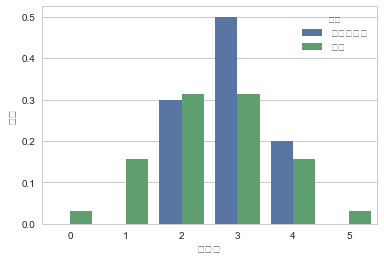

In [59]:
xx1 = np.arange(N1 + 1)
y1 = np.bincount(x1, minlength=N1+1)/float(len(x1))
df = pd.DataFrame({"이론": rv1.pmf(xx1), "시뮬레이션": y1}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.show()

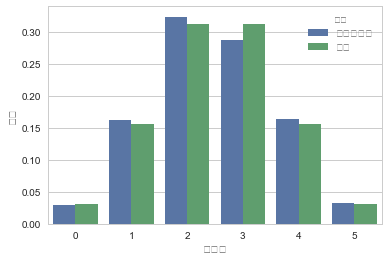

In [60]:
xx2 = np.arange(N1+1)
y2 = np.bincount(x2, minlength=N1+1)/float(len(x2))
df = pd.DataFrame({"이론": rv1.pmf(xx2), "시뮬레이션": y2}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.show()

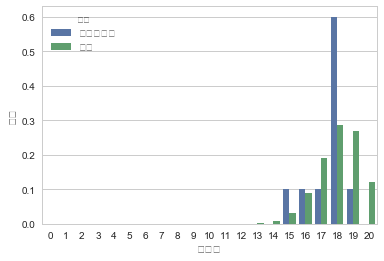

In [61]:
xx3 = np.arange(N2+1)
y3 = np.bincount(x3, minlength=N2+1)/float(len(x3))
df = pd.DataFrame({"이론": rv2.pmf(xx3), "시뮬레이션": y3}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.show()

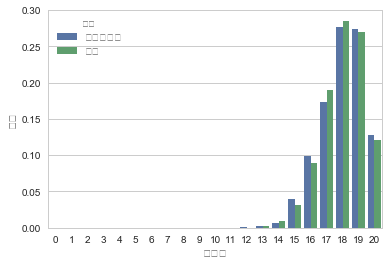

In [62]:
xx4 = np.arange(N2+1)
y4 = np.bincount(x4, minlength=N2+1)/float(len(x4))
df = pd.DataFrame({"이론": rv2.pmf(xx4), "시뮬레이션": y4}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.show()